<a href="https://colab.research.google.com/github/abhipise2704/Deep_Learning-/blob/master/medium_blooggg_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Basic Preporcessing and Data Downloading 

In [1]:
#https://www.kaggle.com/balatmak/newsgroup20bbcnews?select=bbc-text.csv

#https://www.kaggle.com/c/learn-ai-bbc/data?select=BBC+News+Train.csv

## 1.1 Data Downloading

In [1]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.61 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/13351/324297/compressed/BBC%20News%20Train.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1633771451&Signature=jzD%2BGuD3Izvhx2%2F6qS2pBI80zcg7CT70JeS6RtGgUKlMLCT54AIpRjXE2zhAdnVJP1z9OuD7TdDi3OE5V2LqZlmEiGW7DEh%2BzDldg3GWsFWsAaayM35jva3q9ugtkYQv57mBBJaGeu34l%2BkywVnv6xIH5sjt79u0VkJJqB%2BSkdMUiJMuWmjwx44TJXuDI0BHMdCceAToBbgdtxbb6wjv%2BIFiyb8QYvPqRx%2Bye%2FgNqAHD0PjPAhFCeEL9TiqZOsCVFjwuX0%2FGsNYSdnAMuGwj0nvVeWrcQKsi3NhR%2FK%2BncBMsyQvrRdBAaIey7qdiP9hdyxHj59z4ujphbKwyv4uhSg%3D%3D&response-content-disposition=attachment%3B+filename%3D%22BBC+News+Train.csv.zip%22" -c -O 'BBC News Train.csv.zip'

--2021-10-08 04:23:02--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/13351/324297/compressed/BBC%20News%20Train.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1633771451&Signature=jzD%2BGuD3Izvhx2%2F6qS2pBI80zcg7CT70JeS6RtGgUKlMLCT54AIpRjXE2zhAdnVJP1z9OuD7TdDi3OE5V2LqZlmEiGW7DEh%2BzDldg3GWsFWsAaayM35jva3q9ugtkYQv57mBBJaGeu34l%2BkywVnv6xIH5sjt79u0VkJJqB%2BSkdMUiJMuWmjwx44TJXuDI0BHMdCceAToBbgdtxbb6wjv%2BIFiyb8QYvPqRx%2Bye%2FgNqAHD0PjPAhFCeEL9TiqZOsCVFjwuX0%2FGsNYSdnAMuGwj0nvVeWrcQKsi3NhR%2FK%2BncBMsyQvrRdBAaIey7qdiP9hdyxHj59z4ujphbKwyv4uhSg%3D%3D&response-content-disposition=attachment%3B+filename%3D%22BBC+News+Train.csv.zip%22
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1278790 (1.2M) [application/zip]
Saving to: ‘BBC 

## 1.2 Business Problem & Challenges

## 1.3 Importing Libraries

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import plotly
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('stopwords')
import requests
import plotly.offline as pyo
import plotly.graph_objs as go

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## 1.4 Data Loading Into Pandas Dataframe

In [4]:
import zipfile
with zipfile.ZipFile("/content/BBC News Train.csv.zip","r") as zip_ref:
    zip_ref.extractall("/content/")

In [80]:
import zipfile
with zipfile.ZipFile("/content/daily_challenge.zip","r") as zip_ref:
    zip_ref.extractall("/content/")

In [5]:
data=pd.read_csv('/content/BBC News Train.csv')
data.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


# 2 EDA-Exploratory Data Analysis

## 2.1 Data Points in the dataset

In [20]:
print("="*50)
print("Number of rows or Datapoints in the Datasets:",data.shape[0])
print("-"*50)
print("number of clumns in the datasets: ", data.shape[1])
print("="*50)

Number of rows or Datapoints in the Datasets: 1490
--------------------------------------------------
number of clumns in the datasets:  3


In [21]:
data.head(1)

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business


## 2.2 Unique Number of Categories in the Dependent Variable

In [22]:
print("="*60)
print("number of output classes in the dataset:",data['Category'].nunique())
print("="*60)

number of output classes in the dataset: 5


### 2.2.1 Multiclass Classifcation 

In [121]:
#https://analyticsindiamag.com/guide-to-multi-class-classification/
#A classification issue with more than 2 categories, such as identifying a pug, 
#bulldog, or teabetain mastiff from a series of dog breed photos. #
#Multi-class classification requires that each sample is allocated to 
#one of many classes; for example, a dog can be a pug or a bulldog,
# but not both at the same time.

## 2.3 Percentage Distribution output Class

In [23]:
print("="*60)
print("%  of output classes in the dataset:")
print("-"*60)
print(data['Category'].value_counts(normalize=True)*100,)
print("="*60)

%  of output classes in the dataset:
------------------------------------------------------------
sport            23.221477
business         22.550336
politics         18.389262
entertainment    18.322148
tech             17.516779
Name: Category, dtype: float64


### 2.3.1 Evaluation Metric 

In [122]:
#As Data Balanced , Accuracy Metric can be used 

## 2.4 Null Value Check

In [24]:
print("="*50)
print("Null values in the Dataset :",data['Text'].isnull().sum())
print("="*50)

Null values in the Dataset : 0


## 2.5 Data Visualization 

### 2.5.1 Bar Plot of Output Class 

In [32]:

df1 = data.groupby(["Category"]).count().reset_index()

fig_bar= px.bar(df1,
             y=data.groupby(["Category"]).size(),
             x="Category",
             color='Category',
             title="Plot of Different Classes in the Dependent Varible ")
fig_bar.show()


In [33]:
py.plot(fig_bar, filename = 'Bar_Plot_news_depenedent', auto_open=True)

'https://plotly.com/~abhipise2704/1/'

### 2.5.2 Wordcloud Representation of each class 

In [92]:
import nltk
from nltk.corpus import stopwords
#print(stopwords.words('english'))
stopwords_nltk=stopwords.words('english')
stopwords_nltk.append('said')

In [94]:
data.Category.unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

In [ ]:
output_classes=['business', 'tech', 'politics', 'sport', 'entertainment']

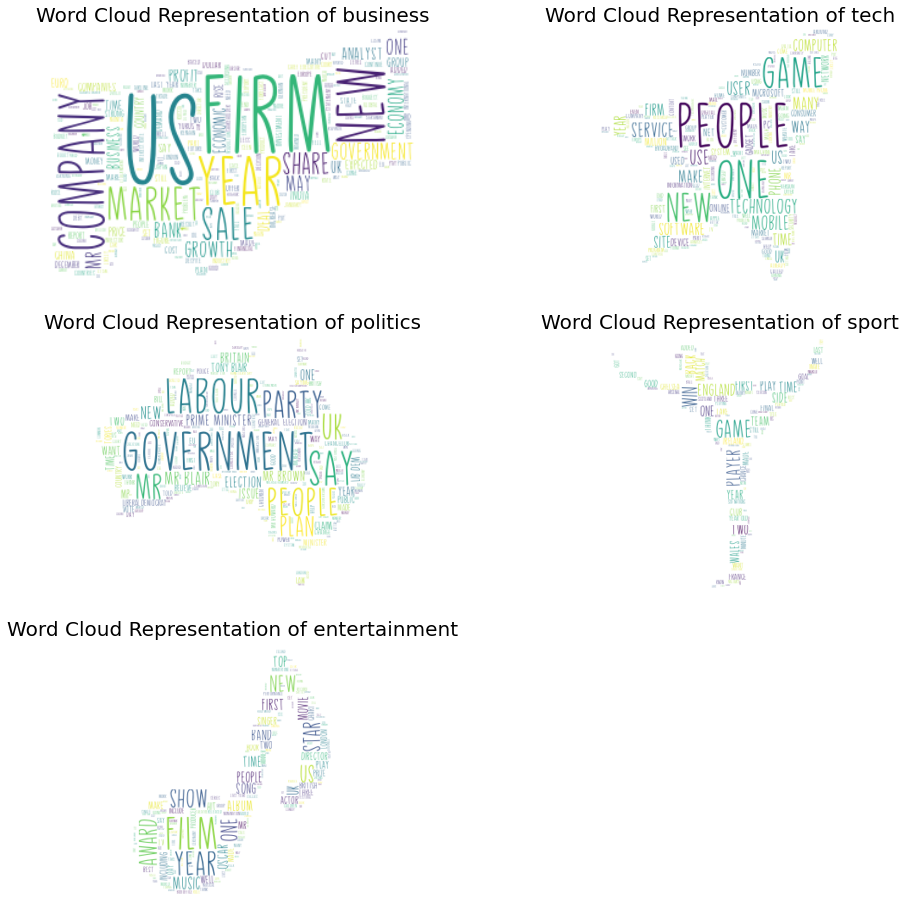

In [99]:
#https://towardsdatascience.com/create-word-cloud-into-any-shape-you-want-using-python-d0b88834bc32
#https://www.dafont.com/
from PIL import Image
import numpy as np
mask_4= np.array(Image.open(requests.get('http://www.clker.com/cliparts/8/e/b/8/11949848722015671592musical_note_nicu_bucule_01.svg.med.png',stream=True).raw))
mask_0= np.array(Image.open(requests.get("http://www.clker.com/cliparts/1/d/b/2/1194984414417201019handshake_01.svg.med.png",stream=True).raw))
mask_2= np.array(Image.open(requests.get('http://www.clker.com/cliparts/1/3/7/9/1194984179624420926australia_02.svg.med.png',stream=True).raw))
mask_3= np.array(Image.open(requests.get('http://www.clker.com/cliparts/d/2/a/a/11954223551240836901gymnast_gerald_g._01.svg.med.png',stream=True).raw))
mask_1= np.array(Image.open(requests.get('http://www.clker.com/cliparts/d/6/8/e/12581269711028989317ElectronicRU_Rocket-Picture.svg.med.png',stream=True).raw))
mask=[mask_0,mask_1,mask_2,mask_3,mask_4]
font_path="/content/Daily Challenge DEMO.otf"



fig = plt.figure(figsize=(16,16))
for i,label in enumerate(output_classes):
    df=data[data['Category']==label]
    all_text = ' '.join(df['Text'].str.lower())

    stopwords = list(STOPWORDS)+stopwords_nltk
    ax = fig.add_subplot(3,2,i+1)
    wordcloud = WordCloud(stopwords=stopwords,
                          mask=mask[i],
                          width=mask[i].shape[1],
                          height=mask[i].shape[0],
                          background_color="white",
                          font_path=font_path,
                          max_words=1000).generate(all_text)
    
    ax.imshow(wordcloud,interpolation="bilinear")
    plt.title("Word Cloud Representation of {}".format(label),fontsize=20)
    ax.axis("off")
plt.show()

### 2.5.3 Number of Words Distribution per Classes 

In [28]:
output_classes=['business', 'tech', 'politics', 'sport', 'entertainment']


df_tech=data[data['Category']=='tech']
df_business=data[data['Category']=='business']
df_sport=data[data['Category']=='sport']
df_entertainment=data[data['Category']=='entertainment']
df_politics=data[data['Category']=='politics']  
dataframes_by_cat_list=[df_tech,df_business,df_sport,df_entertainment,df_politics]

In [29]:
for df_by_cat,name_cat in zip(dataframes_by_cat_list,output_classes):
  df_by_cat['number_words']=df_by_cat['Text'].apply(lambda x:len(x.split()))
  print("="*80)
  print("Mean number of words in the category {}::".format(name_cat),
        df_by_cat['number_words'].mean())
  print("Max number of words in the category {}::".format(name_cat),
        df_by_cat['number_words'].max())
  print("Min number of words in the category {}::".format(name_cat),
        df_by_cat['number_words'].min())
  print("="*80)

Mean number of words in the category business:: 501.8582375478927
Max number of words in the category business:: 1549
Min number of words in the category business:: 188
Mean number of words in the category tech:: 334.16964285714283
Max number of words in the category tech:: 902
Min number of words in the category tech:: 145
Mean number of words in the category politics:: 335.3468208092485
Max number of words in the category politics:: 1671
Min number of words in the category politics:: 116
Mean number of words in the category sport:: 333.9120879120879
Max number of words in the category sport:: 2448
Min number of words in the category sport:: 144
Mean number of words in the category entertainment:: 449.68978102189783
Max number of words in the category entertainment:: 3345
Min number of words in the category entertainment:: 90


In [36]:
[df_tech,df_business,df_sport,df_entertainment,df_politics]

#### 2.5.3.1 Total Numbers of words Distribution in politics

In [ ]:
import plotly.express as px
import chart_studio.plotly as py
import chart_studio

## Connect with chartstudio
username = '' # Add your username
api_key = '' # Add your api key 

chart_studio.tools.set_credentials_file(username = username, api_key = api_key)

In [48]:
data_pdf = [go.Histogram(x = df_politics["number_words"])]
layout = go.Layout(title = "Total Numbers of words Distribution in df_sport")

  # Build the plot
fig_politics = go.Figure(
    data = data_pdf,
    layout = layout)
fig_politics.show()

py.plot(fig_politics, 
        filename = 'Total Numbers of words Distribution in fig_politics', 
        auto_open=True)

'https://plotly.com/~abhipise2704/14/'

#### 2.5.3.2 Total Numbers of words Distribution in Entertainement

In [47]:
data_pdf = [go.Histogram(x = df_entertainment["number_words"])]
layout = go.Layout(title = "Total Numbers of words Distribution in df_sport")

  # Build the plot
fig_entertainment = go.Figure(
    data = data_pdf,
    layout = layout)

fig_entertainment.show()

py.plot(fig_entertainment, 
        filename = 'Total Numbers of words Distribution in fig_entertainment', 
        auto_open=True)

'https://plotly.com/~abhipise2704/12/'

#### 2.5.3.3 Total Numbers of words Distribution in Sport 

In [46]:
data_pdf = [go.Histogram(x = df_sport["number_words"])]
layout = go.Layout(title = "Total Numbers of words Distribution in df_sport")

  # Build the plot
fig_sport = go.Figure(
    data = data_pdf,
    layout = layout)

fig_sport.show()

#fig_business
py.plot(fig_sport, 
        filename = 'Total Numbers of words Distribution in fig_sport', 
        auto_open=True)

'https://plotly.com/~abhipise2704/10/'

#### 2.5.3.4 Total Numbers of words Distribution in Business 

In [43]:
data_pdf = [
    go.Histogram(
      x = df_business["number_words"],
      )
  ]

layout = go.Layout(title = "Total Numbers of words Distribution in df_business")

  # Build the plot
fig_business = go.Figure(
    data = data_pdf,
    layout = layout)

fig_business.show()

#fig_business
py.plot(fig_business, 
        filename = 'Total Numbers of words Distribution in fig_business', 
        auto_open=True)

In [45]:
#fig_business
py.plot(fig_business, 
        filename = 'Total Numbers of words Distribution in fig_business', 
        auto_open=True)

'https://plotly.com/~abhipise2704/7/'

#### 2.5.3.5 Total Numbers of words Distribution in Tech

In [40]:
data_pdf = [
    go.Histogram(
      x = df_tech["number_words"],
      )
  ]

layout = go.Layout(title = "Total Numbers of words Distribution in df_tech")

  # Build the plot
fig_tech = go.Figure(
    data = data_pdf,
    layout = layout)

fig_tech.show()

In [41]:
py.plot(fig_tech, filename = 'Total Numbers of words Distribution in df_tech', auto_open=True)

'https://plotly.com/~abhipise2704/5/'

# 3 Data Preproecessing & Vectorization of Text Data 

## 3.1 Text Preprocessing: StopWord Removal,Special Character Removal 

In [105]:
# https://stackoverflow.com/a/47091490/4084039
import re
def decontracted(phrase):
  # specific
  phrase = re.sub(r"won't", "will not", phrase)
  phrase = re.sub(r"can\'t", "can not", phrase)
  # general
  phrase = re.sub(r"n\'t", " not", phrase)
  phrase = re.sub(r"\'re", " are", phrase)
  phrase = re.sub(r"\'s", " is", phrase)
  phrase = re.sub(r"\'d", " would", phrase)
  phrase = re.sub(r"\'ll", " will", phrase)
  phrase = re.sub(r"\'t", " not", phrase)
  phrase = re.sub(r"\'ve", " have", phrase)
  phrase = re.sub(r"\'m", " am", phrase)
  return phrase

In [106]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [107]:
data.head(2)

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business


In [109]:
# Combining all the above stundents
from tqdm import tqdm
cleaned_text = []
# tqdm is for printing the status bar
for sentance in tqdm(data['Text'].values):
  sent = decontracted(sentance)
  sent = sent.replace('\\r', ' ')
  sent = sent.replace('\\"', ' ')
  sent = sent.replace('\\n', ' ')
  sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
  # https://gist.github.com/sebleier/554280
  sent = ' '.join(e for e in sent.split() if e not in stopwords)
  cleaned_text.append(sent.lower().strip())

100%|██████████| 1490/1490 [00:01<00:00, 966.95it/s]


In [110]:
data['clean_text'] = cleaned_text

In [112]:
data.Category.unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

## 3.2 Train Test Split 80 20 

In [113]:
X=data['clean_text'].values
y=data['Category'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size = 0.20,
                                                    stratify=y, 
                                                    random_state = 0)

## 3.3 Dependent Variable y Label Encoding 

In [114]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train_label_encoded = encoder.fit_transform(y_train)
y_test_label_encoded=encoder.transform(y_test)

## 3.4 BOW representation of Text Data

In [115]:
from sklearn.feature_extraction.text import CountVectorizer
print("="*100)
print("Before vectorizations:")
print("-"*100)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print("="*100)

vectorizer = CountVectorizer(min_df=10,ngram_range=(1,3))

vectorizer.fit(X_train)

X_train_bow = vectorizer.transform(X_train)
X_test_bow = vectorizer.transform(X_test)

print("After vectorizations:")
print("-"*100)
print("X_train_bow shape:",X_train_bow.shape,
      ", y_train_label_encoded shape:",y_train_label_encoded.shape)
print("X_test_bow shape:",X_test_bow.shape,
      ", y_test_label_encoded.shape:",y_test_label_encoded.shape)
print("="*100)

Before vectorizations:
----------------------------------------------------------------------------------------------------
(1192,) (1192,)
(298,) (298,)
After vectorizations:
----------------------------------------------------------------------------------------------------
X_train_bow shape: (1192, 4274) , y_train_label_encoded shape: (1192,)
X_test_bow shape: (298, 4274) , y_test_label_encoded.shape: (298,)


## 3.5 TFIDF Representation of Text Data 

In [116]:
print("="*100)
print("Before vectorizations:")
print("-"*100)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print("="*100)

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1, 3))

vectorizer.fit(X_train)

X_train_tfidf = vectorizer.transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("After vectorizations:")
print("-"*100)
print("X_train_tfidf shape:",X_train_tfidf.shape,
      ", y_train_label_encoded shape:",y_train_label_encoded.shape)
print("X_test_tfidf shape:",X_test_tfidf.shape,
      ", y_test_label_encoded.shape:",y_test_label_encoded.shape)
print("="*100)

Before vectorizations:
----------------------------------------------------------------------------------------------------
(1192,) (1192,)
(298,) (298,)
After vectorizations:
----------------------------------------------------------------------------------------------------
X_train_tfidf shape: (1192, 4274) , y_train_label_encoded shape: (1192,)
X_test_tfidf shape: (298, 4274) , y_test_label_encoded.shape: (298,)


# 4 Machine Learning Model Building 

## 4.1 Naive Bayes Model 

### 4.1.1  Naive Bayes Model on BOW text Data 

#### 4.1.1.1 Hyperparameter Tuning of Naive Bayes Model using GridSearchCV

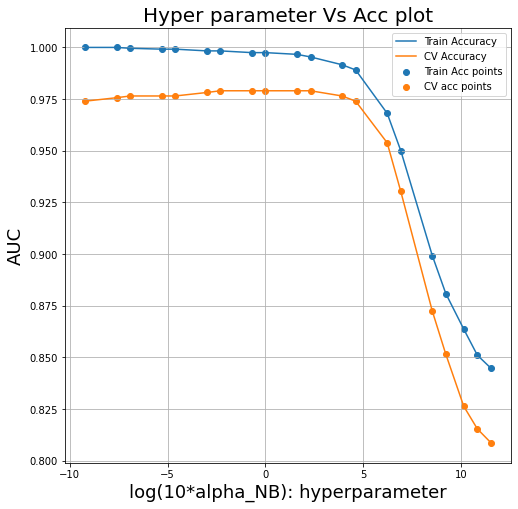

Best_hyperparameter_NB_BoW: {'alpha': 0.01}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.003561,0.000347,0.000887,0.000009,1e-05,{'alpha': 1e-05},0.972362,0.962217,0.987406,0.973995,0.010348,13,1.0,1.0,1.0,1.0,0.0
1,0.003203,0.000042,0.000781,0.000033,5e-05,{'alpha': 5e-05},0.974874,0.962217,0.989924,0.975672,0.011326,11,1.0,1.0,1.0,1.0,0.0


In [118]:
#https://stackoverflow.com/questions/56416576/getting-keyerror-from-sklearn-model-selection-gridsearchcv
#https://stackoverflow.com/questions/57136676/sklearn-model-selection-gridsearchcv-is-throwing-keyerror-mean-train-score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import math 

NB = MultinomialNB(class_prior=[0.2,0.2,0.2,0.2,0.2])
parameters = {'alpha':[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 
                       0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 
                       50, 100, 500, 1000, 2500, 5000, 10000]}

clf = GridSearchCV(NB, parameters, cv=3, scoring='accuracy',return_train_score=True)
clf.fit(X_train_bow , y_train_label_encoded )

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])

train_acc= results['mean_train_score']
train_acc_std= results['std_train_score']
cv_acc = results['mean_test_score'] 
cv_acc_std=results['std_test_score']
alpha_NB = results['param_alpha']

log_alpha_NB=[]
for i in alpha_NB:
    x=math.log(10*i)
    log_alpha_NB.append(x)


plt.figure(figsize=(8,8))
plt.plot(log_alpha_NB, train_acc, label='Train Accuracy')
plt.plot(log_alpha_NB, cv_acc, label='CV Accuracy')
plt.scatter(log_alpha_NB, train_acc, label='Train Acc points')
plt.scatter(log_alpha_NB, cv_acc, label='CV acc points')
plt.legend()
plt.xlabel("log(10*alpha_NB): hyperparameter",fontsize=18)
plt.ylabel("AUC",fontsize=18)
plt.title("Hyper parameter Vs Acc plot",fontsize=20)
plt.grid()
plt.show()


best_alpha=clf.best_params_
print("="*100)
print("Best_hyperparameter_NB_BoW:",best_alpha)
Best_hyperparameter_NB_BoW=best_alpha.get("alpha")
print("="*100)
results.head(2)

#### 4.1.1.2 Training of Naive Bayes Model on Best Hyperparameter & Confusion Matrix 



Text(0.5, 1.0, 'Naive Bayes Test Confusion Matrix (BoW)')

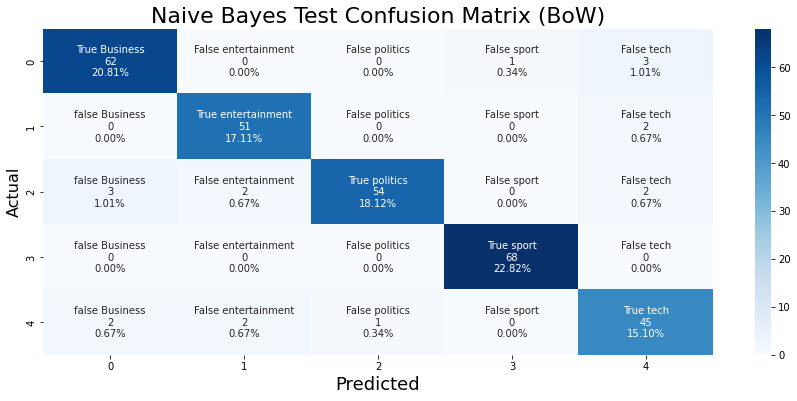

In [123]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

NB = MultinomialNB(alpha=Best_hyperparameter_NB_BoW)
NB.fit(X_train_bow , y_train_label_encoded)
y_test_pred = NB.predict(X_test_bow)
cf_matrix_test=confusion_matrix(y_test_pred,y_test_label_encoded)

plt.figure(figsize=(15,6))
group_names = ['True Business','False entertainment','False politics','False sport',"False tech",
               'false Business','True entertainment','False politics','False sport',"False tech",
               'false Business','False entertainment','True politics','False sport',"False tech",
               'false Business','False entertainment','False politics','True sport',"False tech",
               'false Business','False entertainment','False politics','False sport',"True tech"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_test.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_test.flatten()/np.sum(cf_matrix_test)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(5,5)
sns.heatmap(cf_matrix_test, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Actual', fontsize=16)
plt.title('Naive Bayes Test Confusion Matrix (BoW)',fontsize=22)

#### 4.1.1.3 Classification Report 

In [124]:
from sklearn.metrics import classification_report
print(classification_report(y_test_label_encoded, y_test_pred, target_names=encoder.classes_))

               precision    recall  f1-score   support

     business       0.94      0.93      0.93        67
entertainment       0.96      0.93      0.94        55
     politics       0.89      0.98      0.93        55
        sport       1.00      0.99      0.99        69
         tech       0.90      0.87      0.88        52

     accuracy                           0.94       298
    macro avg       0.94      0.94      0.94       298
 weighted avg       0.94      0.94      0.94       298



### 4.1.2 Naive Bayes Model on TFIDF text Data 

#### 4.1.2.1 Hyperparameter Tuning of Naive Bayes Model using GridSearchCV

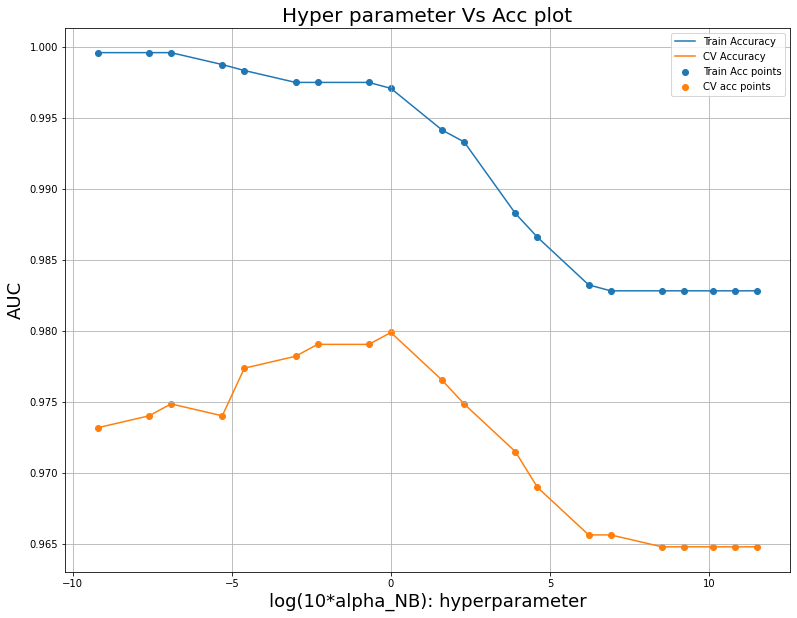

Best_hyperparameter_NB_tfidf: {'alpha': 0.1}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.003888,0.000406,0.000884,0.000019,1e-05,{'alpha': 1e-05},0.967337,0.967254,0.984887,0.973159,0.008293,11,1.0,1.0,0.998742,0.999581,0.000593
1,0.003421,0.000068,0.000835,0.000012,5e-05,{'alpha': 5e-05},0.972362,0.964736,0.984887,0.973995,0.008307,10,1.0,1.0,0.998742,0.999581,0.000593


In [125]:
#https://stackoverflow.com/questions/56416576/getting-keyerror-from-sklearn-model-selection-gridsearchcv
#https://stackoverflow.com/questions/57136676/sklearn-model-selection-gridsearchcv-is-throwing-keyerror-mean-train-score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import math 

NB = MultinomialNB(class_prior=[0.2,0.2,0.2,0.2,0.2])
parameters = {'alpha':[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 
                       0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 
                       50, 100, 500, 1000, 2500, 5000, 10000]}

clf = GridSearchCV(NB, parameters, cv=3, scoring='accuracy',return_train_score=True)
clf.fit(X_train_tfidf , y_train_label_encoded )

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])

train_acc= results['mean_train_score']
train_acc_std= results['std_train_score']
cv_acc = results['mean_test_score'] 
cv_acc_std=results['std_test_score']
alpha_NB = results['param_alpha']

log_alpha_NB=[]
for i in alpha_NB:
    x=math.log(10*i)
    log_alpha_NB.append(x)


plt.figure(figsize=(13,10))
plt.plot(log_alpha_NB, train_acc, label='Train Accuracy')
plt.plot(log_alpha_NB, cv_acc, label='CV Accuracy')
plt.scatter(log_alpha_NB, train_acc, label='Train Acc points')
plt.scatter(log_alpha_NB, cv_acc, label='CV acc points')
plt.legend()
plt.xlabel("log(10*alpha_NB): hyperparameter",fontsize=18)
plt.ylabel("AUC",fontsize=18)
plt.title("Hyper parameter Vs Acc plot",fontsize=20)
plt.grid()
plt.show()


best_alpha=clf.best_params_
print("="*100)
print("Best_hyperparameter_NB_tfidf:",best_alpha)
Best_hyperparameter_NB_tfidf=best_alpha.get("alpha")
print("="*100)
results.head(2)

#### 4.1.2.2 Training of Naive Bayes Model on Best Hyperparameter & Confusion Matrix 

Text(0.5, 1.0, 'Naive Bayes Test Confusion Matrix (tfidf)')

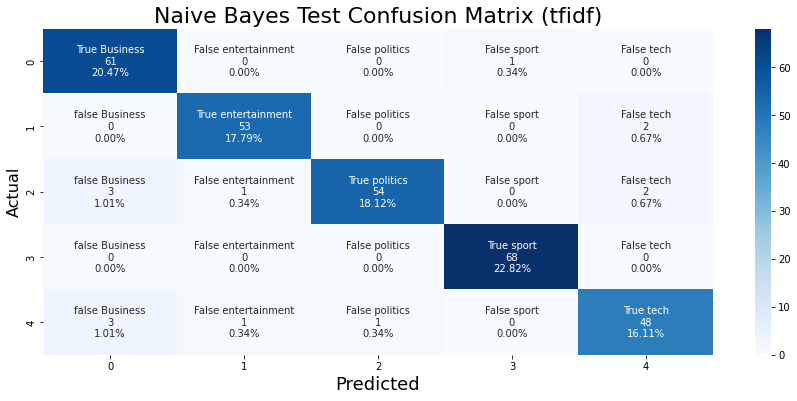

In [126]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

NB = MultinomialNB(alpha=Best_hyperparameter_NB_tfidf)
NB.fit(X_train_tfidf , y_train_label_encoded)
y_test_pred = NB.predict(X_test_tfidf)
cf_matrix_test=confusion_matrix(y_test_pred,y_test_label_encoded)

plt.figure(figsize=(15,6))
group_names = ['True Business','False entertainment','False politics','False sport',"False tech",
               'false Business','True entertainment','False politics','False sport',"False tech",
               'false Business','False entertainment','True politics','False sport',"False tech",
               'false Business','False entertainment','False politics','True sport',"False tech",
               'false Business','False entertainment','False politics','False sport',"True tech"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_test.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_test.flatten()/np.sum(cf_matrix_test)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(5,5)
sns.heatmap(cf_matrix_test, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Actual', fontsize=16)
plt.title('Naive Bayes Test Confusion Matrix (tfidf)',fontsize=22)

#### 4.1.2.3 Classification Report 

In [127]:
from sklearn.metrics import classification_report
print(classification_report(y_test_label_encoded, y_test_pred, target_names=encoder.classes_))

               precision    recall  f1-score   support

     business       0.98      0.91      0.95        67
entertainment       0.96      0.96      0.96        55
     politics       0.90      0.98      0.94        55
        sport       1.00      0.99      0.99        69
         tech       0.91      0.92      0.91        52

     accuracy                           0.95       298
    macro avg       0.95      0.95      0.95       298
 weighted avg       0.95      0.95      0.95       298



## 4.2 Logistic Regression Model 

### 4.2.1 Hyperparameter Tuning of Logistic Rgression model on text data(TFIDF) using GridSearchCV 

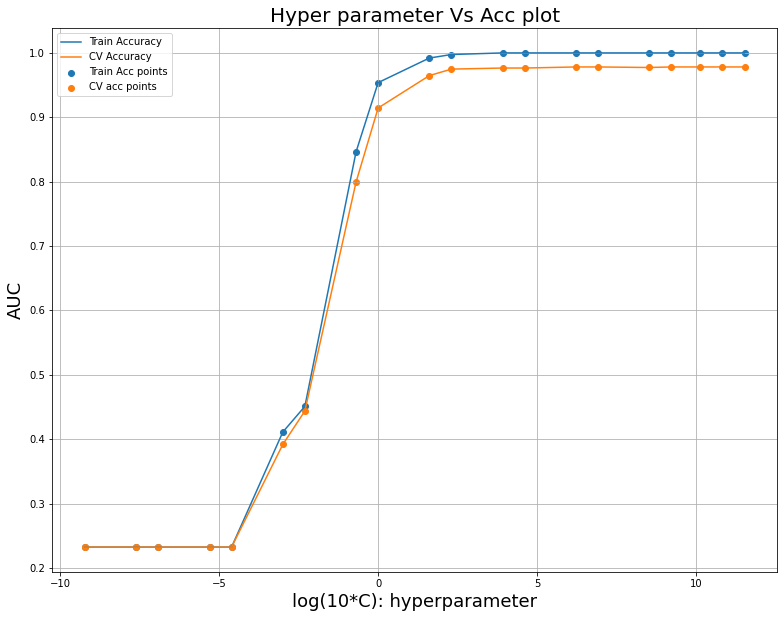

Best_hyperparameter_LR_tfidf: {'C': 1000}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.153252,0.024886,0.001327,0.000029,1e-05,{'C': 1e-05},0.231156,0.234257,0.231738,0.232384,0.001346,16,0.232997,0.231447,0.232704,0.232383,0.000673
1,0.158519,0.053737,0.001338,0.000077,5e-05,{'C': 5e-05},0.231156,0.234257,0.231738,0.232384,0.001346,16,0.232997,0.231447,0.232704,0.232383,0.000673


In [128]:
#https://stackoverflow.com/questions/56416576/getting-keyerror-from-sklearn-model-selection-gridsearchcv
#https://stackoverflow.com/questions/57136676/sklearn-model-selection-gridsearchcv-is-throwing-keyerror-mean-train-score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import math 

LR = LogisticRegression(multi_class='multinomial', solver='lbfgs')
parameters = {'C':[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 
                       0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 
                       50, 100, 500, 1000, 2500, 5000, 10000]}

clf = GridSearchCV(LR, parameters, cv=3, scoring='accuracy',return_train_score=True)
clf.fit(X_train_tfidf , y_train_label_encoded )

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_C'])

train_acc= results['mean_train_score']
train_acc_std= results['std_train_score']
cv_acc = results['mean_test_score'] 
cv_acc_std=results['std_test_score']
param_C = results['param_C']

log_param_C=[]
for i in param_C:
    x=math.log(10*i)
    log_param_C.append(x)

plt.figure(figsize=(13,10))
plt.plot(log_param_C, train_acc, label='Train Accuracy')
plt.plot(log_param_C, cv_acc, label='CV Accuracy')
plt.scatter(log_param_C, train_acc, label='Train Acc points')
plt.scatter(log_param_C, cv_acc, label='CV acc points')
plt.legend()
plt.xlabel("log(10*C): hyperparameter",fontsize=18)
plt.ylabel("AUC",fontsize=18)
plt.title("Hyper parameter Vs Acc plot",fontsize=20)
plt.grid()
plt.show()


best_C=clf.best_params_
print("="*100)
print("Best_hyperparameter_LR_tfidf:",best_C)
Best_hyperparameter_LR_tfidf=best_C.get("C")
print("="*100)
results.head(2)

### 4.2.2 Training of Logistic Regression Model on Best Hyperparameter & Confusion Matrix 



Text(0.5, 1.0, 'LR Test Confusion Matrix (tfidf)')

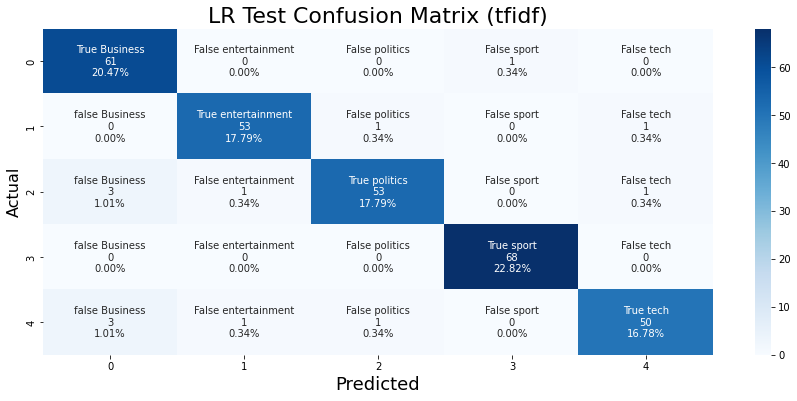

In [129]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

LR = LogisticRegression(C=Best_hyperparameter_LR_tfidf,
                        multi_class='multinomial', 
                        solver='lbfgs')
LR.fit(X_train_tfidf , y_train_label_encoded)
y_test_pred = LR.predict(X_test_tfidf)
cf_matrix_test=confusion_matrix(y_test_pred,y_test_label_encoded)

plt.figure(figsize=(15,6))
group_names = ['True Business','False entertainment','False politics','False sport',"False tech",
               'false Business','True entertainment','False politics','False sport',"False tech",
               'false Business','False entertainment','True politics','False sport',"False tech",
               'false Business','False entertainment','False politics','True sport',"False tech",
               'false Business','False entertainment','False politics','False sport',"True tech"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_test.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_test.flatten()/np.sum(cf_matrix_test)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(5,5)
sns.heatmap(cf_matrix_test, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Actual', fontsize=16)
plt.title('LR Test Confusion Matrix (tfidf)',fontsize=22)

### 4.2.3 Classification Report 

In [130]:
from sklearn.metrics import classification_report
print(classification_report(y_test_label_encoded, y_test_pred, target_names=encoder.classes_))

               precision    recall  f1-score   support

     business       0.98      0.91      0.95        67
entertainment       0.96      0.96      0.96        55
     politics       0.91      0.96      0.94        55
        sport       1.00      0.99      0.99        69
         tech       0.91      0.96      0.93        52

     accuracy                           0.96       298
    macro avg       0.95      0.96      0.95       298
 weighted avg       0.96      0.96      0.96       298



# 5 Deep Learning Model Building, Transfer Learning using HuggingFace Transformers 

In [68]:
tf.keras.backend.clear_session()

## 5.1 Train Test Split 90 10 


In [69]:
X=data['Text'].values
y=data['Category'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size = 0.10, 
                                                    random_state = 0)

## 5.2 Dependent Variable One Hot Encoding 

In [70]:
from sklearn.preprocessing import OneHotEncoder
y_train=np.array(y_train)
y_test=np.array(y_test)

y_train=y_train.reshape(-1, 1)
y_test=y_test.reshape(-1, 1)

enc = OneHotEncoder()

y_train_ohe=enc.fit_transform(y_train)
y_test_ohe=enc.transform(y_test)

y_train_ohe=y_train_ohe.toarray()
y_test_ohe=y_test_ohe.toarray()

In [71]:
print("="*50)
print("shape of y_train one encoded :", y_train_ohe.shape)
print("-"*50)
print("shape of y_test one encoded :", y_test_ohe.shape)
print("="*50)

shape of y_train one encoded : (1341, 5)
--------------------------------------------------
shape of y_test one encoded : (149, 5)


In [72]:
#!pip install transformers

## 5.3 Tokenization of Text data using "bert-base-uncased"

In [73]:
from transformers import BertTokenizer

In [74]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [75]:
def tokenize(sentence):
  tokens = tokenizer.encode_plus(sentence, 
                                 max_length=512,
                                 truncation=True, 
                                 padding='max_length',
                                 add_special_tokens=True, 
                                 return_token_type_ids=False,
                                 return_tensors='tf')
  
  return tokens['input_ids'], tokens['attention_mask']

In [76]:
X_train.shape

(1341,)

In [77]:
import numpy as np

X_train_ids = np.zeros((len(X_train), 512))
X_train_mask = np.zeros((len(X_train), 512))

X_test_ids = np.zeros((len(X_test), 512))
X_test_mask = np.zeros((len(X_test), 512))

In [78]:
print("="*50)
print("shape of X_train_ids:",X_train_ids.shape)
print("-"*50)
print("shape of X_train_mask:",X_train_mask.shape)
print("="*50)

print("="*50)
print("shape of X_test_ids:",X_test_ids.shape)
print("-"*50)
print("shape of X_test_mask:",X_test_mask.shape)
print("="*50)

shape of X_train_ids: (1341, 512)
--------------------------------------------------
shape of X_train_mask: (1341, 512)
shape of X_test_ids: (149, 512)
--------------------------------------------------
shape of X_test_mask: (149, 512)


In [79]:
for i, sequence in enumerate(X_train):
    tokens = tokenize(sequence)
    X_train_ids[i, :], X_train_mask[i, :] = tokens[0], tokens[1]

In [80]:
for i, sequence in enumerate(X_test):
    tokens = tokenize(sequence)
    X_test_ids[i, :], X_test_mask[i, :] = tokens[0], tokens[1]

## 5.4 Converting the tokenized ids and Mask into tensorflow Tensors 

In [81]:
X_train_ids = tf.convert_to_tensor(X_train_ids)
X_train_mask = tf.convert_to_tensor(X_train_mask)

X_test_ids = tf.convert_to_tensor(X_test_ids)
X_test_mask = tf.convert_to_tensor(X_test_mask)

In [82]:
#arr = data['category'].values

In [83]:
#labels = np.zeros((arr.size, arr.max()+1))

In [84]:
#labels[np.arange(arr.size), arr] = 1

In [85]:
#y_train_ohe

## 5.5 Preparaing Train and Test Dataset for Tensorflow Format  

In [86]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [87]:
data_train = tf.data.Dataset.from_tensor_slices((X_train_ids, 
                                                 X_train_mask, 
                                                 y_train_ohe))

data_test = tf.data.Dataset.from_tensor_slices((X_test_ids, 
                                                X_test_mask, 
                                                y_test_ohe))

## 5.6 Making Mini Batches using tensforflow Functions 

In [88]:
SHUFFLE = 100000
BATCH_SIZE = 16

In [89]:
def map_func(input_ids, masks, labels):
    return {'input_ids': input_ids, 'attention_mask': masks}, labels

In [90]:
data_train = data_train.map(map_func)

data_test = data_test.map(map_func)

In [91]:
train = data_train.shuffle(SHUFFLE).batch(BATCH_SIZE) #, drop_remainder=True)

val = data_test.shuffle(SHUFFLE).batch(BATCH_SIZE)

In [92]:
#data_train.shape()

In [113]:
SIZE = X_train_ids.shape[0]/BATCH_SIZE
SIZE

83.8125

In [114]:
#SPLIT = 0.9

#train = data.take(int(SIZE*SPLIT))
#val = data.skip(int(SIZE*SPLIT))

#del data

## 5.7 Model Building Using Pretraing bert-base-uncased 

In [115]:
from transformers import TFAutoModel
bert = TFAutoModel.from_pretrained('bert-base-uncased')

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [96]:
bert.summary()

Model: "tf_bert_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  109482240 
Total params: 109,482,240
Trainable params: 109,482,240
Non-trainable params: 0
_________________________________________________________________


### 5.7.1 Customizing the output layer for our Problem

In [97]:
#https://github.com/jamescalam/transformers/blob/main/course/project_build_tf_sentiment_model/sentiment.ipynb
###https://djajafer.medium.com/multi-class-text-classification-with-keras-and-lstm-4c5525bef592

input_ids = tf.keras.layers.Input(shape=(512,), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(512,), name='attention_mask', dtype='int32')

embeddings = bert.bert(input_ids, attention_mask=mask)[0]  # we access the transformer model within our bert object using the bert attribute (eg bert.bert instead of bert)

x = tf.keras.layers.Dropout(0.4)(embeddings)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(768))(x)
y = tf.keras.layers.Dense(5, activation='softmax', name='outputs')(x)

model = tf.keras.Model(inputs=[input_ids, mask], outputs=y)

model.layers[2].trainable = False

### 5.7.2 Model Summary 

In [98]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 512)]        0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 512)]        0                                            
__________________________________________________________________________________________________
bert (TFBertMainLayer)          TFBaseModelOutputWit 109482240   input_ids[0][0]                  
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
dropout_37 (Dropout)            (None, 512, 768)     0           bert[0][0]                   

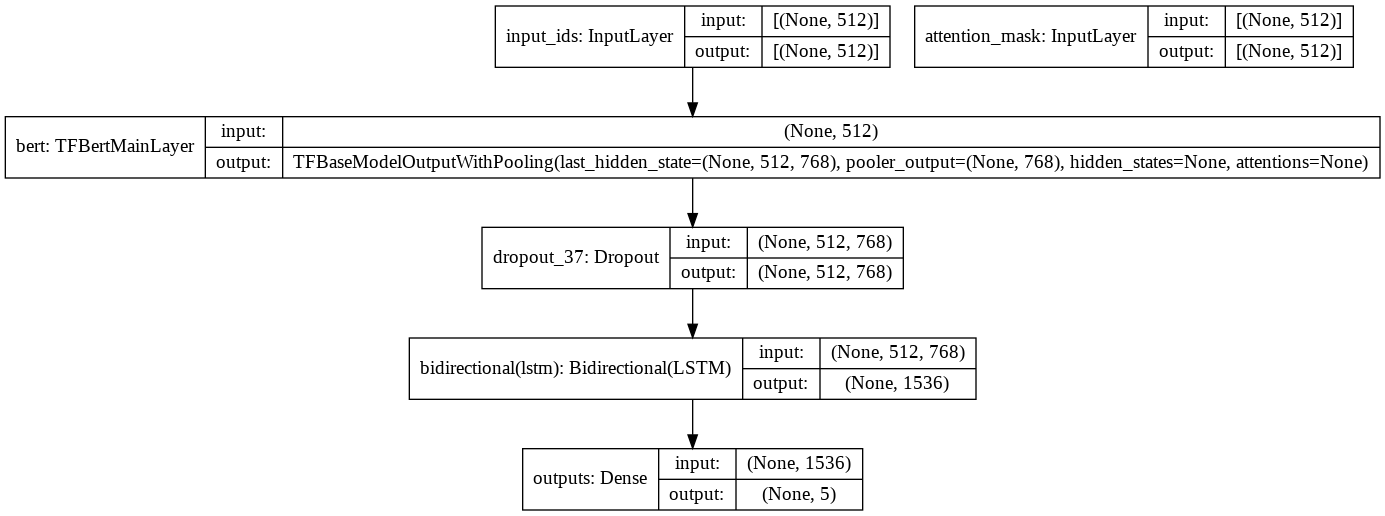

In [99]:
# summarize the model
from tensorflow.keras.utils import plot_model

plot_model(model, 'model.png', show_shapes=True)

### 5.7.3 Model Compilation 

In [100]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, decay=1e-6)
loss = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=[acc])

### 5.7.4 Model Training 

In [102]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_accuracy',
                               min_delta=0,
                               patience=3,
                               verbose=2, 
                               mode='max')
checkpoint = ModelCheckpoint("best_model.hdf5",
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True, 
                             mode='max', 
                             period=1)
callbacks_1 = [early_stopping,checkpoint]

In [103]:
history = model.fit(train,
                    validation_data=val,
                    epochs=2,
                    callbacks=callbacks_1)

Epoch 1/2
84/84 [==============================] - 206s 2s/step - loss: 0.3731 - accuracy: 0.8680 - val_loss: 0.0541 - val_accuracy: 0.9799

Epoch 00001: val_accuracy improved from -inf to 0.97987, saving model to best_model.hdf5
Epoch 2/2
84/84 [==============================] - 184s 2s/step - loss: 0.0938 - accuracy: 0.9754 - val_loss: 0.0746 - val_accuracy: 0.9597

Epoch 00002: val_accuracy did not improve from 0.97987


### 5.7.5 Performance Plotting 

In [105]:
bert_model=pd.DataFrame(history.history)

In [106]:
bert_model

,loss,accuracy,val_loss,val_accuracy
0,0.373091,0.868009,0.054138,0.979866
1,0.093762,0.975392,0.074553,0.959732


<Figure size 432x288 with 0 Axes>

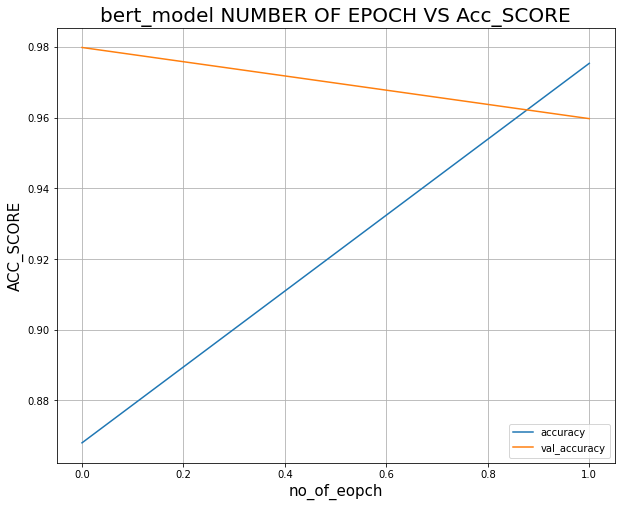

In [107]:
plt.figure()
ax=bert_model[['accuracy','val_accuracy']].plot(figsize=(10, 8))
ax.set_ylabel('ACC_SCORE',fontsize=15)
ax.set_xlabel('no_of_eopch',fontsize=15)
ax.set_title('bert_model NUMBER OF EPOCH VS Acc_SCORE',fontsize=20)
plt.grid()

## 5.8 Final Inference on test Dataset 

In [109]:
from keras.models import load_model
best_model = load_model('/content/best_model.hdf5')

In [111]:
rounded_predictions = best_model.predict(val, batch_size=128, verbose=0)
#rounded_predictions

In [216]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def prep_data(text):
    tokens = tokenizer.encode_plus(text, max_length=512,
                                   truncation=True, padding='max_length',
                                   add_special_tokens=True, return_token_type_ids=False,
                                   return_tensors='tf')
    # tokenizer returns int32 tensors, we need to return float64, so we use tf.cast
    return {'input_ids': tf.cast(tokens['input_ids'], tf.float64),
            'attention_mask': tf.cast(tokens['attention_mask'], tf.float64)}

In [217]:
import zipfile
with zipfile.ZipFile("/content/BBC News Test.csv.zip","r") as zip_ref:
    zip_ref.extractall("/content/")

In [219]:
data_test = pd.read_csv('/content/BBC News Test.csv')
data_test.head()

,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...


In [221]:
data_test['Category'] = None

for i, row in data_test.iterrows():
  # get token tensors
  tokens = prep_data(row['Text'])
  # get probabilities
  probs = best_model.predict(tokens)
  # find argmax for winning class
  pred = np.argmax(probs)
  # add to dataframe
  data_test.at[i, 'Category'] = pred

data_test.head()

,ArticleId,Text,Category
0,1018,qpr keeper day heads for preston queens park r...,3
1,1319,software watching while you work software that...,4
2,1138,d arcy injury adds to ireland woe gordon d arc...,3
3,459,india s reliance family feud heats up the ongo...,0
4,1020,boro suffer morrison injury blow middlesbrough...,3


# 6 Comaparison of all the Models 

In [120]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Vectorizer", "Model", "Test Accuracy",]

x.add_row(["BOW", "Naive_Bayes","0.94"])
x.add_row(["TFIDF", "Naive_Bayes","0.95"])
x.add_row(["TFIDF", "Logistic_Regression","0.96"])
x.add_row(["Transfer Learning", "BERT Embedding","0.979866"])


print(x)

+-------------------+---------------------+---------------+
|     Vectorizer    |        Model        | Test Accuracy |
+-------------------+---------------------+---------------+
|        BOW        |     Naive_Bayes     |      0.94     |
|       TFIDF       |     Naive_Bayes     |      0.95     |
|       TFIDF       | Logistic_Regression |      0.96     |
| Transfer Learning |    BERT Embedding   |    0.979866   |
+-------------------+---------------------+---------------+
